In [94]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import json

In [95]:
path_ = 'mp_fedavg/pareto_fedavg_id/attacked_class_10/dirty_rate_1.0/proportion_10.0/num_malicious_20/csv/0'
path_cs = 'mp_fedavg/pareto_fedavg_id/attacked_class_10/dirty_rate_1.0/proportion_10.0/num_malicious_20/confidence_score.json'

In [96]:
data = pd.DataFrame()
for round in range(1, 201):
# round = 2
    with open(path_ + "/" + f'epoch{round}.csv', 'r') as file:
        data_round = pd.read_csv(file, header=0, index_col=0)
    with open(path_cs, 'r') as file:
        cs_round = json.load(file)[str(round)]
        cs_list = []
        for key in cs_round.keys():
            cs_list.append(np.sqrt(10)*sum(cs_round[key].values())/len(cs_round[key]))
        data_round["confidence score"] = cs_list
    data = pd.concat([data, data_round], ignore_index=True)
        
data

,o0,o1,o2,o3,o4,o5,o6,o7,o8,o9,sum_grads,target,ID,confidence score
0,0.285055,0.678908,-1.180653,-1.196231,0.112785,0.497648,0.349941,0.195122,0.322426,-0.064995,0.000006,benign,2,1.043777
1,0.319144,0.806311,-1.039068,0.412177,0.294201,0.802837,0.343754,-3.233893,0.455782,0.838748,-0.000008,attacker,4,0.536605
2,0.947873,-2.863439,1.460078,-3.154771,0.869548,1.781740,1.019816,1.057103,-3.358003,2.240082,0.000029,benign,5,0.793852
3,4.007660,-13.146131,5.132456,5.762089,3.543773,6.740812,4.870595,4.252746,5.225672,-26.389679,-0.000010,attacker,37,0.533063
4,-2.708464,1.147304,1.163037,1.028962,0.601508,-2.089178,0.776593,-2.678677,0.951491,1.807411,-0.000014,benign,7,0.752251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.092231,0.047217,0.029962,0.001185,0.119408,0.129545,-0.184939,0.003594,-0.009735,-0.044002,0.000004,benign,16,2.183322
1996,0.085341,0.024903,0.016117,0.016417,0.062124,0.008136,-0.052009,-0.186485,-0.001476,0.026929,-0.000002,attacker,48,1.869880
1997,-0.026404,0.027889,0.008878,0.084396,-0.193947,0.457051,-0.342530,0.004778,-0.004348,-0.015755,0.000009,benign,24,2.329253
1998,0.059808,0.071555,0.045675,0.092473,0.113545,-0.517854,0.139508,0.014577,-0.000677,-0.018605,0.000006,attacker,26,1.786773


In [97]:
# np.random.seed(42)

# rndperm = np.random.permutation(df.shape[0])

In [98]:
feat_cols = [f'o{i}' for i in range(10)]
feat_cols.append('confidence score')

df_subset = data.copy()

data_subset = df_subset[feat_cols].values
# data_subset = df_subset[df_subset["ID"].isin([0,1,2,3,4,5,6,7,8,9])][feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

# df_subset = df_subset[df_subset["ID"].isin([0,1,2,3,4,5,6,7,8,9])]
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.45380186 0.24588546 0.14964944]


In [99]:
df_subset

,o0,o1,o2,o3,o4,o5,o6,o7,o8,o9,sum_grads,target,ID,confidence score,pca-one,pca-two,pca-three
0,0.285055,0.678908,-1.180653,-1.196231,0.112785,0.497648,0.349941,0.195122,0.322426,-0.064995,0.000006,benign,2,1.043777,0.387801,-1.045752,-0.777783
1,0.319144,0.806311,-1.039068,0.412177,0.294201,0.802837,0.343754,-3.233893,0.455782,0.838748,-0.000008,attacker,4,0.536605,0.050609,-1.356561,-0.267419
2,0.947873,-2.863439,1.460078,-3.154771,0.869548,1.781740,1.019816,1.057103,-3.358003,2.240082,0.000029,benign,5,0.793852,1.142270,-1.129281,-1.352811
3,4.007660,-13.146131,5.132456,5.762089,3.543773,6.740812,4.870595,4.252746,5.225672,-26.389679,-0.000010,attacker,37,0.533063,-8.197724,27.411321,-12.000112
4,-2.708464,1.147304,1.163037,1.028962,0.601508,-2.089178,0.776593,-2.678677,0.951491,1.807411,-0.000014,benign,7,0.752251,2.328581,-1.163463,2.524126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.092231,0.047217,0.029962,0.001185,0.119408,0.129545,-0.184939,0.003594,-0.009735,-0.044002,0.000004,benign,16,2.183322,0.874841,-0.154331,-0.356330
1996,0.085341,0.024903,0.016117,0.016417,0.062124,0.008136,-0.052009,-0.186485,-0.001476,0.026929,-0.000002,attacker,48,1.869880,0.746711,-0.149592,-0.215618
1997,-0.026404,0.027889,0.008878,0.084396,-0.193947,0.457051,-0.342530,0.004778,-0.004348,-0.015755,0.000009,benign,24,2.329253,0.866780,-0.189254,-0.411169
1998,0.059808,0.071555,0.045675,0.092473,0.113545,-0.517854,0.139508,0.014577,-0.000677,-0.018605,0.000006,attacker,26,1.786773,0.682723,-0.028607,0.119750


In [100]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.003s...


/mnt/disk1/anaconda3/envs/longnd/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/mnt/disk1/anaconda3/envs/longnd/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 2000 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.480820
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.991257
[t-SNE] KL divergence after 1000 iterations: 0.541457
t-SNE done! Time elapsed: 47.10420775413513 seconds


In [101]:
df_subset['tsne-3d-one'] = tsne_results[:,0]
df_subset['tsne-3d-two'] = tsne_results[:,1]
df_subset['tsne-3d-three'] = tsne_results[:,2]

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne-2d-one", y="tsne-2d-two",
#     hue="target",
#     palette=sns.color_palette("hls", 2),
#     data=df_subset,
#     legend="full",
#     alpha=0.3
# )


In [102]:
df_subset

,o0,o1,o2,o3,o4,o5,o6,o7,o8,o9,sum_grads,target,ID,confidence score,pca-one,pca-two,pca-three,tsne-3d-one,tsne-3d-two,tsne-3d-three
0,0.285055,0.678908,-1.180653,-1.196231,0.112785,0.497648,0.349941,0.195122,0.322426,-0.064995,0.000006,benign,2,1.043777,0.387801,-1.045752,-0.777783,15.502066,7.001134,-9.507331
1,0.319144,0.806311,-1.039068,0.412177,0.294201,0.802837,0.343754,-3.233893,0.455782,0.838748,-0.000008,attacker,4,0.536605,0.050609,-1.356561,-0.267419,-15.974021,-4.956054,-7.874792
2,0.947873,-2.863439,1.460078,-3.154771,0.869548,1.781740,1.019816,1.057103,-3.358003,2.240082,0.000029,benign,5,0.793852,1.142270,-1.129281,-1.352811,8.224618,-12.060026,11.874218
3,4.007660,-13.146131,5.132456,5.762089,3.543773,6.740812,4.870595,4.252746,5.225672,-26.389679,-0.000010,attacker,37,0.533063,-8.197724,27.411321,-12.000112,-0.280254,-3.556131,22.775045
4,-2.708464,1.147304,1.163037,1.028962,0.601508,-2.089178,0.776593,-2.678677,0.951491,1.807411,-0.000014,benign,7,0.752251,2.328581,-1.163463,2.524126,-18.775551,-4.548196,2.984551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.092231,0.047217,0.029962,0.001185,0.119408,0.129545,-0.184939,0.003594,-0.009735,-0.044002,0.000004,benign,16,2.183322,0.874841,-0.154331,-0.356330,5.107091,-5.490205,-2.140562
1996,0.085341,0.024903,0.016117,0.016417,0.062124,0.008136,-0.052009,-0.186485,-0.001476,0.026929,-0.000002,attacker,48,1.869880,0.746711,-0.149592,-0.215618,2.427098,-2.534530,0.042445
1997,-0.026404,0.027889,0.008878,0.084396,-0.193947,0.457051,-0.342530,0.004778,-0.004348,-0.015755,0.000009,benign,24,2.329253,0.866780,-0.189254,-0.411169,5.642563,-5.364812,-3.947379
1998,0.059808,0.071555,0.045675,0.092473,0.113545,-0.517854,0.139508,0.014577,-0.000677,-0.018605,0.000006,attacker,26,1.786773,0.682723,-0.028607,0.119750,5.992832,0.727543,0.606117


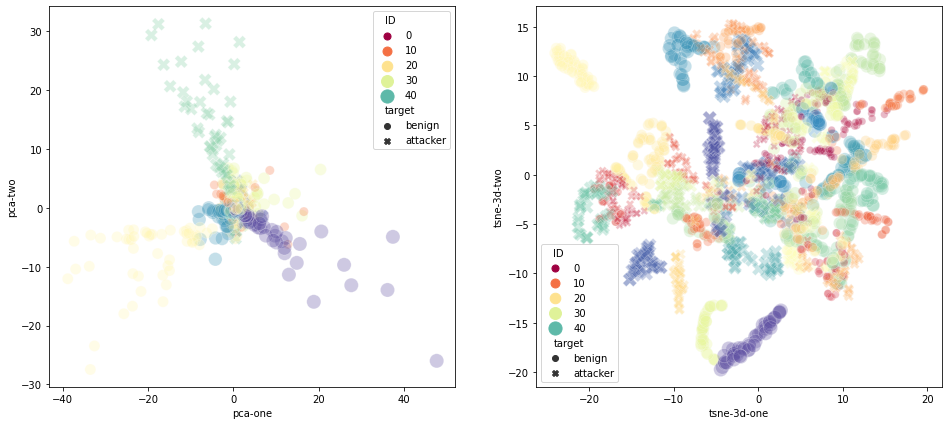

In [103]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="ID",
    size="ID",
    sizes=(50,200),
    style="target",
    # palette=sns.color_palette('hls', 50),
    palette=sns.color_palette("Spectral", as_cmap=True),
    data=df_subset,
    # legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-3d-one", y="tsne-3d-two",
    style="target",
    hue="ID",
    size="ID",
    sizes=(50,200),
    # palette=sns.color_palette('hls', 50),
    palette=sns.color_palette("Spectral", as_cmap=True),
    data=df_subset,
    # legend="full",
    alpha=0.3,
    ax=ax2
)


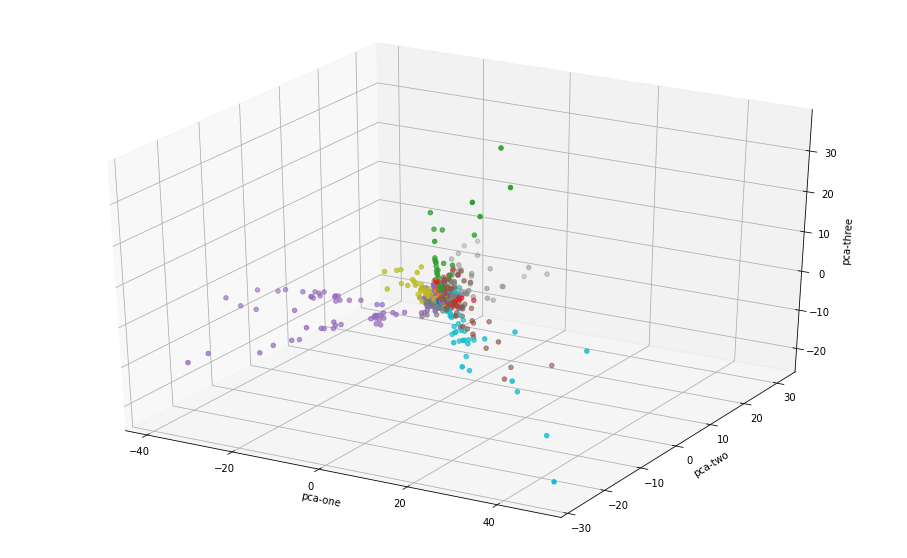

In [104]:
marker_list = [f'${_}$' for _ in range(50)]
c_ =[]
for i in df_subset["target"]:
    if i == "benign":
        c_.append('green')
    else:
        c_.append('red')
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["pca-one"], 
    ys=df_subset["pca-two"], 
    zs=df_subset["pca-three"], 
    c=df_subset["ID"], 
    cmap='tab10',
    # marker=marker_list
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

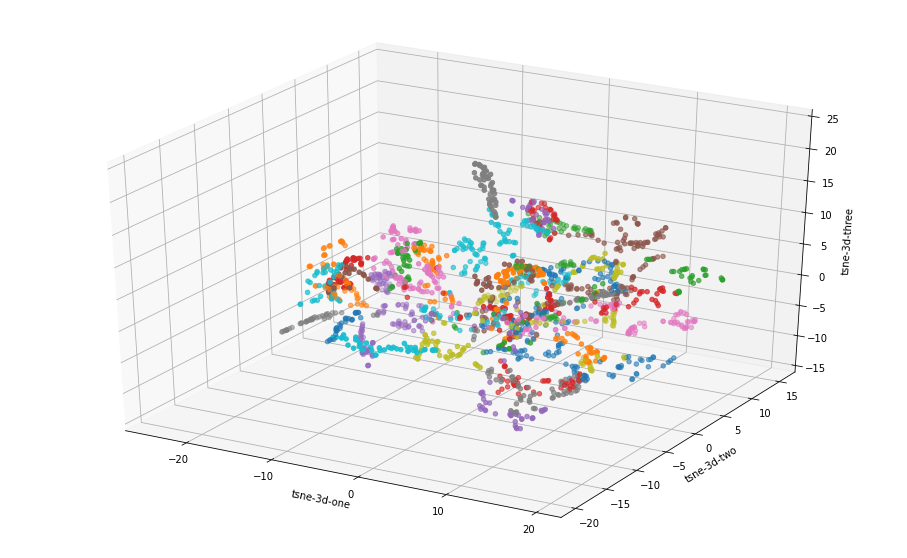

In [105]:
c_ =[]
for i in df_subset["target"]:
    if i == "benign":
        c_.append('green')
    else:
        c_.append('red')
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset["tsne-3d-one"], 
    ys=df_subset["tsne-3d-two"], 
    zs=df_subset["tsne-3d-three"], 
    c=df_subset["ID"],
    # c=c_,
    cmap='tab10'
)
ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-two')
ax.set_zlabel('tsne-3d-three')
plt.show()

In [106]:
df_subset[df_subset["target"]=='benign'].describe()

,o0,o1,o2,o3,o4,o5,o6,o7,o8,o9,sum_grads,ID,confidence score,pca-one,pca-two,pca-three,tsne-3d-one,tsne-3d-two,tsne-3d-three
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1.180000e+03,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,0.475121,-0.081103,-0.662625,0.414009,-0.270602,-0.229401,0.253109,-0.142731,-0.133348,0.377577,5.351437e-06,23.543220,2.136507,-0.120663,-0.504093,0.205966,2.150134,0.563364,-1.486206
std,2.151177,2.084072,4.292965,2.440245,1.963946,1.773501,3.026964,0.781950,1.109999,1.740546,1.470237e-04,13.849145,0.494273,5.501875,2.570786,3.123757,9.864681,7.883071,7.383339
min,-24.155975,-13.181014,-39.262740,-31.356182,-21.767180,-20.995304,-29.962395,-4.904340,-11.073348,-8.352703,-9.994507e-04,0.000000,0.728099,-38.794837,-27.465806,-21.984724,-24.086378,-19.753750,-13.400445
25%,0.030338,-0.012589,-0.575165,0.042666,-0.367142,-0.607483,-0.022662,0.003214,0.005532,0.005028,-1.345342e-05,11.000000,1.742397,-0.280461,-0.596486,-0.238657,-4.256439,-4.583221,-8.199108
50%,0.334955,0.070756,0.037293,0.308971,0.046779,0.027930,0.291353,0.012485,0.029363,0.101683,8.530915e-07,23.000000,2.053831,0.387746,-0.155248,0.044018,4.885608,0.604415,-0.984718
75%,0.788022,0.329301,0.270936,0.782537,0.227469,0.210503,0.898194,0.043547,0.101251,0.553788,1.580827e-05,35.000000,2.593511,0.754831,0.304738,0.600494,9.531244,7.030568,4.115400
max,13.100234,14.404705,21.303432,13.352925,14.924791,12.980068,13.923401,5.672352,6.452598,16.295769,1.819134e-03,49.000000,3.127471,47.649112,6.782726,35.797703,19.554569,15.003268,13.350462


In [107]:
df_subset[df_subset["target"]=='attacker'].describe()


,o0,o1,o2,o3,o4,o5,o6,o7,o8,o9,sum_grads,ID,confidence score,pca-one,pca-two,pca-three,tsne-3d-one,tsne-3d-two,tsne-3d-three
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,8.200000e+02,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.423462,-0.249475,0.083567,0.605972,0.221643,0.050157,0.286723,-0.546510,-0.190316,-0.685222,7.181678e-07,26.463415,1.707393,0.173638,0.725402,-0.296390,-4.034384,-0.294226,2.238381
std,1.259297,1.845912,1.209479,1.338909,0.523985,0.919615,1.404985,0.943957,0.687595,3.446996,4.032167e-05,15.389446,0.467868,1.993452,3.922390,1.225289,7.866611,7.005931,7.126685
min,-3.907378,-13.645472,-3.204317,-4.130834,-2.215321,-6.786417,-3.733708,-4.599714,-3.542747,-29.311916,-4.053116e-04,3.000000,0.523079,-19.210645,-5.167574,-12.000112,-21.353001,-13.693249,-9.306398
25%,-0.036714,0.012883,-0.468081,0.087353,0.053397,0.029214,-0.293351,-1.090784,-0.363448,-0.398721,-1.024455e-05,13.000000,1.328685,-0.027459,-0.492553,-0.406684,-9.537591,-4.566815,-3.399374
50%,0.295187,0.112400,0.065208,0.383742,0.118808,0.087138,0.133989,0.009662,0.029104,0.089970,-2.980232e-08,26.000000,1.689315,0.503715,-0.148823,-0.184059,-3.169481,-1.559203,1.757879
75%,0.615908,0.341027,0.287347,0.822990,0.267363,0.235250,0.527865,0.028100,0.084963,0.332108,1.159310e-05,41.000000,2.147156,0.821491,0.468704,0.128242,1.473402,3.816005,6.763121
max,12.533093,2.823632,13.406834,13.791452,5.788827,6.740812,11.512224,4.252746,5.232762,3.526783,3.471375e-04,48.000000,2.653011,6.713539,31.320938,4.183405,11.902542,15.338519,23.349228
